In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-coupon-redemption/Datasets columns explanation_.docx
/kaggle/input/predicting-coupon-redemption/test.csv
/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv
/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv
/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv
/kaggle/input/predicting-coupon-redemption/train/item_data.csv
/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv
/kaggle/input/predicting-coupon-redemption/train/train.csv


In [2]:
import seaborn as sns

In [3]:
# Viewing training dataset
train_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/train.csv')
train_df

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [4]:
#checking for null values in training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
# Viewing test dataset
test_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/test.csv')
test_df

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [6]:
# checking for null values in test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
#Customer transaction dataset
cus_tsc_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv')
cus_tsc_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [8]:
# checking for null values in customer demographics dataset
cus_tsc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [9]:
cus_tsc_df=cus_tsc_df.sample(n=100000)
cus_tsc_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
13165,2012-02-02,368,9622,1,170.62,0.00,0.0
919764,2013-02-05,323,25341,2,142.48,-84.78,0.0
1186866,2013-05-13,839,28439,1,59.49,-11.75,0.0
948224,2013-02-16,1377,28939,1,78.01,-7.12,0.0
764167,2012-12-11,1473,9954,1,35.62,0.00,0.0
...,...,...,...,...,...,...,...
203857,2012-05-21,380,20487,1,53.07,0.00,0.0
206664,2012-05-22,1475,23874,1,12.47,0.00,0.0
1143685,2013-04-27,799,25643,1,71.24,-17.45,0.0
1039577,2013-03-19,142,69586,1,88.69,0.00,0.0


In [10]:
# merging train_df and cus_tsc_df
train_tsc_df=pd.merge(train_df,cus_tsc_df,left_on='customer_id',right_on='customer_id')

# merging test_df and cus_tsc_df
test_tsc_df=pd.merge(test_df, cus_tsc_df, left_on='customer_id',right_on='customer_id')


In [11]:
test_tsc_df=test_tsc_df.drop('date',axis=1)

In [12]:
test_tsc_df

,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,3,22,869,967,37273,1,138.56,0.00,0.00
1,3,22,869,967,24396,1,124.31,0.00,0.00
2,3,22,869,967,46053,1,123.60,0.00,0.00
3,3,22,869,967,7532,1,120.75,0.00,0.00
4,3,22,869,967,55377,1,70.88,0.00,0.00
...,...,...,...,...,...,...,...,...,...
4611301,106228,24,43,710,41602,1,117.90,-59.49,0.00
4611302,106228,24,43,710,59884,1,272.85,-183.09,0.00
4611303,106228,24,43,710,31875,1,42.39,-14.25,0.00
4611304,106228,24,43,710,41235,2,2241.92,0.00,-284.96


In [13]:
[i for i in train_tsc_df.columns]

['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'redemption_status',
 'date',
 'item_id',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount']

In [14]:
# Training coupon redemption based on customer transaction dataset
# includes categorical data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

X=train_tsc_df[['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'item_id',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount']]

y=train_tsc_df['redemption_status']

model=RandomForestClassifier(n_estimators=10).fit(X,y)
cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.98713791 0.98688064 0.9868282  0.98680853 0.98150573 0.98626285
 0.98624319 0.98556804 0.98410139 0.98673313] 
 mean of cross validation scores: 0.9858069606426492


In [15]:
imp_df = pd.DataFrame([['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'item_id',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount'],model.feature_importances_]).T.rename(columns={0:'Feature',1:'Imp'})
imp_df.sort_values('Imp',ascending=False)

,Feature,Imp
0,id,0.401726
3,customer_id,0.286111
2,coupon_id,0.224206
1,campaign_id,0.0254628
4,item_id,0.0246613
6,selling_price,0.0193735
7,other_discount,0.0110958
5,quantity,0.00458992
8,coupon_discount,0.00277398


Text(0.5, 1.0, 'Cross Validation Scores')

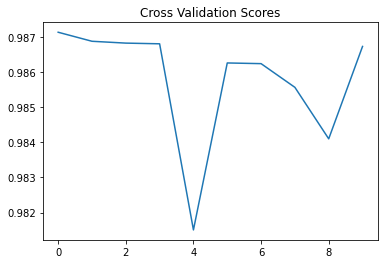

In [16]:
import matplotlib.pyplot as plt
sns.lineplot(np.arange(len(cv_scores)),cv_scores)
plt.gca().set_title('Cross Validation Scores')

In [17]:
predictions=model.predict(test_tsc_df)

In [18]:
sum([1 for i in predictions if i==1]), sum([1 for i in predictions if i==0])

(5574, 4605732)

Text(0.5, 1.0, 'Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

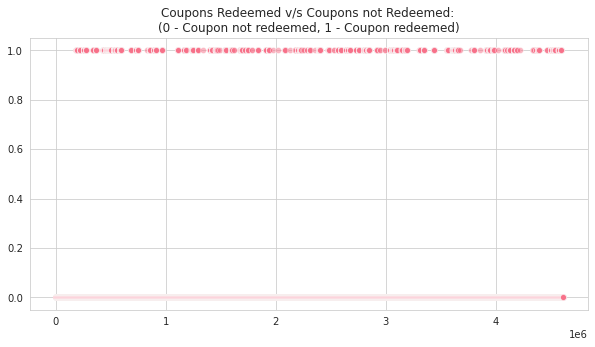

In [19]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.scatterplot(np.arange(len(predictions)),predictions,alpha=0.5)

plt.gca().set_title('Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')


In [20]:
# Training coupon redemption based on customer transaction dataset
# includes categorical data
# does not includes ids columns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

X=train_tsc_df[[
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount']]

y=train_tsc_df['redemption_status']

model=RandomForestClassifier(n_estimators=10).fit(X,y)
cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.98735586 0.98319522 0.97719597 0.97961796 0.97608166 0.98735422
 0.98062903 0.98598919 0.9746068  0.98735584] 
 mean of cross validation scores: 0.981938172492373


In [21]:
# Calculating feature imp. of customer transaction dataset
imp_df1 = pd.DataFrame([[
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount'],model.feature_importances_]).T.rename(columns={0:'Feature',1:'Imp'})
imp_df1.sort_values('Imp',ascending=False)

,Feature,Imp
1,selling_price,0.460783
2,other_discount,0.320274
3,coupon_discount,0.141946
0,quantity,0.0769966


Text(0, 0.5, 'importance')

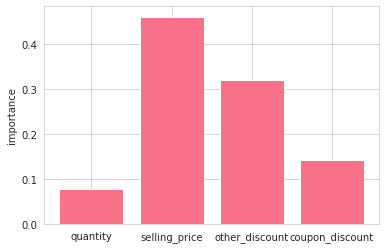

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(imp_df1['Feature'],imp_df1['Imp'])
plt.ylabel('importance')

In [23]:
#Customer demographics dataset
cus_dem_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv')
cus_dem_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [24]:
# checking for null values in customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [25]:
#preprocessing dataset: replacing null values
cus_dem_df['no_of_children'].replace({np.NaN:0},inplace=True)
cus_dem_df['marital_status'].replace({np.NaN:'Unknown'},inplace=True)


In [26]:
# Again, checking for null values after preprocessing customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  760 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [27]:
# merging train_df and cus_dem_df
train_dem_df=pd.merge(train_df,cus_dem_df,left_on='customer_id',right_on='customer_id')

# merging test_df and cus_dem_df
test_dem_df=pd.merge(test_df, cus_dem_df, left_on='customer_id',right_on='customer_id')

#one_hot_encoding
train_dem_df=pd.get_dummies(train_dem_df)
test_dem_df=pd.get_dummies(test_dem_df)
final_train, final_test = train_dem_df.align(test_dem_df,join='inner',axis=1)

In [28]:
final_train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'rented',
       'income_bracket', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+'],
      dtype='object')

In [29]:
# Training coupon redemption based on customer demographics dataset
# includes categorical data
# exclude ids columns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

X=final_train[[ 'rented',
       'income_bracket', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+']]

y=train_dem_df['redemption_status']

model=RandomForestClassifier(n_estimators=80).fit(X,y)
cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.98694756 0.98717361 0.94090701 0.95350435 0.96862116 0.97136967
 0.98694457 0.97572148 0.96243701 0.98694457] 
 mean of cross validation scores: 0.9720571015217303


In [30]:
# Calculating feature imp. of customer demographics dataset
imp_df2 = pd.DataFrame([[
       'rented',
       'income_bracket', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+'],model.feature_importances_]).T.rename(columns={0:'Feature',1:'Imp'})
imp_df2.sort_values('Imp',ascending=False)

,Feature,Imp
1,income_bracket,0.520171
0,rented,0.066704
3,age_range_26-35,0.0450121
5,age_range_46-55,0.0417686
4,age_range_36-45,0.0411697
6,age_range_56-70,0.0394953
10,marital_status_Unknown,0.037467
9,marital_status_Single,0.0266149
8,marital_status_Married,0.0245701
12,family_size_2,0.02131


Text(0, 0.5, 'importance')

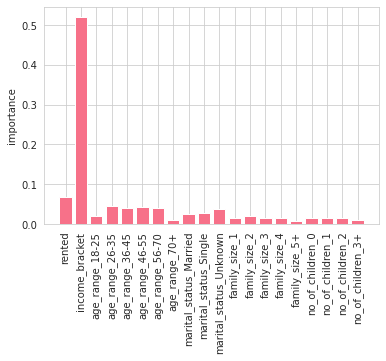

In [31]:
plt.figure()
plt.bar(imp_df2['Feature'],imp_df2['Imp'])
plt.xticks(rotation=90)
plt.ylabel('importance')

In [32]:
#Campaign dataset
camp_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv')
camp_df

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [33]:
camp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [34]:
#Coupon item mapping Dataset
cpn_map_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv')
cpn_map_df

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
...,...,...
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390


In [35]:
cpn_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [36]:
# Item Dataset
item_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/item_data.csv')
item_df

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
...,...,...,...,...
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical


In [37]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [38]:
# Merging coupon item mapping and item dataset
cpn_item_df=pd.merge(cpn_map_df,item_df,left_on='item_id',right_on='item_id')
cpn_item_df

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
...,...,...,...,...,...
92658,33,68764,3867,Established,Meat
92659,29,74013,5383,Established,Miscellaneous
92660,29,71965,4554,Established,Miscellaneous
92661,29,67815,4985,Established,Flowers & Plants


In [39]:
# Merging training data with campaign data and then with coupon data(cpn_item_df)
train_camp_df = pd.merge(train_df,camp_df,left_on='campaign_id',right_on='campaign_id')
train_camp_cpn_df = pd.merge(train_camp_df, cpn_item_df, left_on='coupon_id', right_on='coupon_id')
train_camp_cpn_df

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,1404,1636,Established,Grocery
1,1,13,27,1053,0,X,19/05/13,05/07/13,1418,1105,Established,Grocery
2,1,13,27,1053,0,X,19/05/13,05/07/13,1449,1636,Established,Grocery
3,1,13,27,1053,0,X,19/05/13,05/07/13,1515,1105,Established,Grocery
4,1,13,27,1053,0,X,19/05/13,05/07/13,1532,1636,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
6420689,126179,1,562,787,0,Y,12/12/12,18/01/13,65961,360,Established,Grocery
6420690,126179,1,562,787,0,Y,12/12/12,18/01/13,66016,360,Established,Grocery
6420691,126179,1,562,787,0,Y,12/12/12,18/01/13,66035,360,Established,Grocery
6420692,126179,1,562,787,0,Y,12/12/12,18/01/13,66048,360,Established,Grocery


In [40]:
# checking for duplicate values
train_camp_cpn_df.duplicated().values.any()

False

In [41]:
train_camp_cpn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420694 entries, 0 to 6420693
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   campaign_id        int64 
 2   coupon_id          int64 
 3   customer_id        int64 
 4   redemption_status  int64 
 5   campaign_type      object
 6   start_date         object
 7   end_date           object
 8   item_id            int64 
 9   brand              int64 
 10  brand_type         object
 11  category           object
dtypes: int64(7), object(5)
memory usage: 636.8+ MB


In [42]:
# Merging test data with campaign data and then with coupon data(cpn_item_df)
test_camp_df = pd.merge(test_df,camp_df,left_on='campaign_id',right_on='campaign_id')
test_camp_cpn_df = pd.merge(test_camp_df, cpn_item_df, left_on='coupon_id', right_on='coupon_id')
test_camp_cpn_df

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,3,22,869,967,X,16/09/13,18/10/13,1033,1075,Established,Grocery
1,3,22,869,967,X,16/09/13,18/10/13,1067,1075,Established,Grocery
2,3,22,869,967,X,16/09/13,18/10/13,1084,1075,Established,Grocery
3,3,22,869,967,X,16/09/13,18/10/13,1124,1075,Established,Grocery
4,3,22,869,967,X,16/09/13,18/10/13,1125,1075,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...
5421796,127955,24,43,800,Y,21/10/13,20/12/13,73885,5147,Established,Grocery
5421797,127955,24,43,800,Y,21/10/13,20/12/13,73906,2074,Established,Grocery
5421798,127955,24,43,800,Y,21/10/13,20/12/13,73922,2074,Established,Grocery
5421799,127955,24,43,800,Y,21/10/13,20/12/13,73975,2074,Established,Grocery


In [43]:
test_camp_cpn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421801 entries, 0 to 5421800
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   campaign_id    int64 
 2   coupon_id      int64 
 3   customer_id    int64 
 4   campaign_type  object
 5   start_date     object
 6   end_date       object
 7   item_id        int64 
 8   brand          int64 
 9   brand_type     object
 10  category       object
dtypes: int64(6), object(5)
memory usage: 496.4+ MB


In [44]:
#Training model using RandomForestClassifier for last 18 years based on just campaign and coupon data
# using categorical data


from sklearn.ensemble import RandomForestClassifier


#one_hot_encoding for handling categorical data
train_predictor=pd.get_dummies(train_camp_cpn_df)
test_predictor=pd.get_dummies(test_camp_cpn_df)

final_train, final_test = train_predictor.align(test_predictor,join='inner', axis=1)

X=final_train[['brand',
       'campaign_type_X', 'campaign_type_Y', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']]
       
y=train_camp_cpn_df['redemption_status']

model=RandomForestClassifier(n_estimators=10).fit(X,y)

cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))



cross validation scores: [0.90672045 0.88155186 0.90600402 0.95132306 0.95132455 0.93243561
 0.95115945 0.95132455 0.94404184 0.95132455] 
 mean of cross validation scores: 0.9327209932889783


In [45]:
# Calculating feature imp. of campaign and coupon_item dataset
imp_df3 = pd.DataFrame([['brand',
       'campaign_type_X', 'campaign_type_Y', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)'],model.feature_importances_]).T.rename(columns={0:'Feature',1:'Imp'})
imp_df3.sort_values('Imp',ascending=False)

,Feature,Imp
0,brand,0.383247
9,category_Grocery,0.152449
2,campaign_type_Y,0.150636
1,campaign_type_X,0.112728
14,category_Pharmaceutical,0.0575077
12,category_Natural Products,0.0505016
13,category_Packaged Meat,0.0196757
7,category_Flowers & Plants,0.019248
10,category_Meat,0.0178478
18,category_Skin & Hair Care,0.00854551


Text(0, 0.5, 'importance')

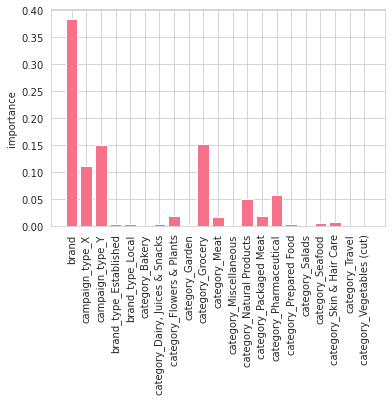

In [46]:
plt.figure()
plt.bar(imp_df3['Feature'],imp_df3['Imp'])
plt.xticks(rotation=90)
plt.ylabel('importance')